In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
#file_path = "Master_Estacao_Darro_2024.csv"
file_path = "Met_Estacao_Darro_2024.csv"
met_data_ED = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
met_data_ED.head()

day.ignore    year  julian      hr  Temp ©     RH  windDir  windSpd    rad  \
0       111.0  2004.0   209.0   800.0   20.57  49.75    110.9     3.90  270.6   
1       111.0  2004.0   209.0   800.0   21.71  45.75    108.1     4.08  368.1   
2       111.0  2004.0   209.0   900.0   23.24  41.75    103.9     3.90  459.4   
3       111.0  2004.0   209.0   900.0   24.01  39.25     92.7     3.53  540.6   
4       111.0  2004.0   209.0  1000.0   25.95  34.75     82.8     2.97  614.4   

      PAR  ...  vel_vento_WVc  Dir_vento_SMM vel_vento_Max  Date_TMx  \
0   638.8  ...            NaN            NaN           NaN       NaN   
1   758.8  ...            NaN            NaN           NaN       NaN   
2   991.3  ...            NaN            NaN           NaN       NaN   
3  1201.3  ...            NaN            NaN           NaN       NaN   
4  1386.3  ...            NaN            NaN           NaN       NaN   

  vel_vento_WVc_1 vel_vento_WVc_2  vel_vento_WVc_3  Day Month  Year  
0             NaN             NaN              NaN   27     7  2004  
1             NaN             NaN              NaN   27     7  2004  
2             NaN             NaN              NaN   27     7  2004  
3             NaN             NaN              NaN   27     7  2004  
4             NaN             NaN              NaN   27     7  2004  

[5 rows x 29 columns]

In [6]:
met_data_ED.columns

Index(['day.ignore', 'year', 'julian', 'hr', 'Temp ©', 'RH', 'windDir',
       'windSpd', 'rad', 'PAR', 'press', 'VBatt', 'Date', 'windspd2', 'Date2',
       'HOUR', 'precip (mm)', 'RecNbr', 'quantum_Avg', 'vel_vento_WVc',
       'Dir_vento_SMM', 'vel_vento_Max', 'Date_TMx', 'vel_vento_WVc_1',
       'vel_vento_WVc_2', 'vel_vento_WVc_3', 'Day', 'Month', 'Year'],
      dtype='object')

In [8]:
met_data_ED.columns

Index(['day.ignore', 'year', 'julian', 'hr', 'Tmp', 'RH', 'windDir', 'windSpd',
       'rad', 'PAR', 'press', 'VBatt', 'ppt', 'Date', 'windspd2', 'Date2',
       'HOUR', 'ppt_cor', 'RecNbr', 'quantum_Avg', 'vel_vento_WVc',
       'Dir_vento_SMM', 'vel_vento_Max', 'Date_TMx', 'vel_vento_WVc_1',
       'vel_vento_WVc_2', 'vel_vento_WVc_3', 'Day', 'Month', 'Year'],
      dtype='object')

<Axes: >

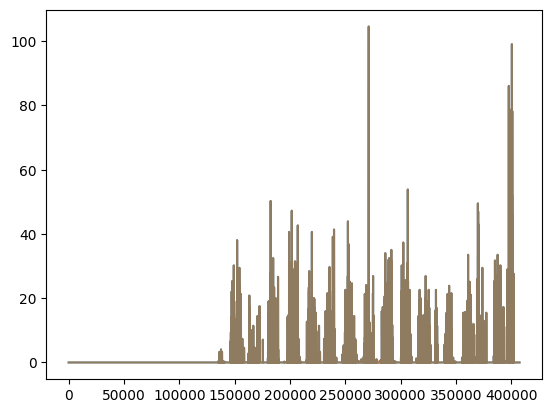

In [ ]:
met_data_ED['ppt'].plot()
met_data_ED['ppt_cor'].plot(alpha=0.5)


<Axes: >

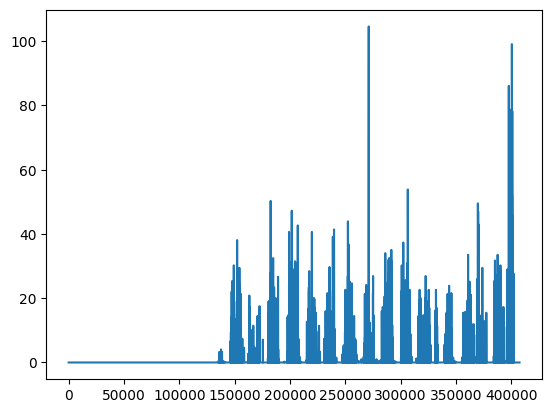

In [15]:
met_data_ED['precip (mm)'].plot()


In [29]:
# Reload the dataset
file_path = "Met_Estacao_Darro_2024.csv"
file_path = "Master_Estacao_Darro_2024.csv"
met_data_ED = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# Rename columns for clarity
if file_path == "Master_Estacao_Darro_2024.csv":
    print('HERE')
    # Select relevant columns
    selected_columns = ['Year', 'Month', 'Day', 'hr', 'Tmp', 'RH', 'windDir', 'windSpd', 'ppt', 'press', 'rad']
    selected_data = met_data_ED[selected_columns].copy()
    selected_data.rename(columns={
        'Year': 'Year',
        'Month': 'Month',
        'Day': 'Day',
        'hr': 'Hour',
        'Tmp': 'Temperature (°C)',
        'RH': 'Relative Humidity (%)',
        'windDir': 'Wind Direction',
        'windSpd': 'Wind Speed',
        'ppt': 'Precipitation (mm)',
        'press': 'Pressure',
        'rad': 'Radiation'
    }, inplace=True)
else:
    # Select relevant columns
    selected_columns = ['Year', 'Month', 'Day', 'hr', 'Temp ©', 'RH', 'windDir', 'windSpd', 'precip (mm)', 'press', 'rad']
    selected_data = met_data_ED[selected_columns].copy()
    selected_data.rename(columns={
        'Year': 'Year',
        'Month': 'Month',
        'Day': 'Day',
        'hr': 'Hour',
        'Temp ©': 'Temperature (°C)',
        'RH': 'Relative Humidity (%)',
        'windDir': 'Wind Direction',
        'windSpd': 'Wind Speed',
        'precip (mm)': 'Precipitation (mm)',
        'press': 'Pressure',
        'rad': 'Radiation'
    }, inplace=True)

# Combine Year, Month, and Day into a single datetime index
selected_data['Datetime'] = pd.to_datetime(selected_data[['Year', 'Month', 'Day']])

# Set as index
selected_data.set_index('Datetime', inplace=True)

# Select odd and even rows separately
odd_rows = selected_data.iloc[1::2].copy()  # Select every odd row (1st index onward, step 2)
even_rows = selected_data.iloc[0::2].copy()  # Select every even row (0th index onward, step 2)

# Drop Year, Month, and Day columns
odd_rows.drop(columns=['Year', 'Month', 'Day'], inplace=True)
even_rows.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Check actual column names
odd_columns = list(odd_rows.columns) #Estacao
even_columns = list(even_rows.columns) #Darro

print('odd dataframe (count nans):')
print(odd_rows.isna().sum())
print('even dataframe (count nans):')
print(even_rows.isna().sum())

HERE
odd dataframe (count nans):
Hour                     50024
Temperature (°C)         20308
Relative Humidity (%)    20566
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64
even dataframe (count nans):
Hour                     50024
Temperature (°C)         20317
Relative Humidity (%)    20576
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64


In [31]:
selected_data.tail()

Year  Month  Day  Hour  Temperature (°C)  Relative Humidity (%)  \
Datetime                                                                      
2024-09-20  2024      9   20   NaN             22.00                  75.29   
2024-09-20  2024      9   20   NaN             26.23                  54.15   
2024-09-20  2024      9   20   NaN             30.34                  34.29   
2024-09-20  2024      9   20   NaN             32.37                  28.35   
2024-09-20  2024      9   20   NaN             33.95                  25.68   

            Wind Direction  Wind Speed  Precipitation (mm)  Pressure  \
Datetime                                                               
2024-09-20           144.3       0.000                 0.0       971   
2024-09-20           216.6       0.037                 0.0       971   
2024-09-20           262.0       0.699                 0.0       971   
2024-09-20           260.0       0.912                 0.0       972   
2024-09-20           255.5       1.365                 0.0       972   

            Radiation  
Datetime               
2024-09-20        NaN  
2024-09-20        NaN  
2024-09-20        NaN  
2024-09-20        NaN  
2024-09-20        NaN

<Axes: >

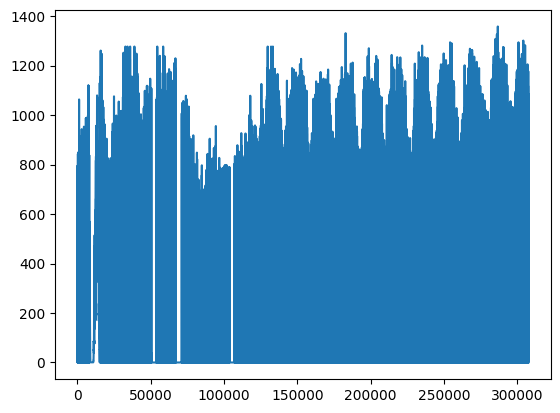

In [33]:
met_data_ED['rad'].plot()

odd dataframe:
Hour                     50024
Temperature (°C)         20308
Relative Humidity (%)    20566
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64
even dataframe:
Hour                     50024
Temperature (°C)         20317
Relative Humidity (%)    20576
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                50024
dtype: int64


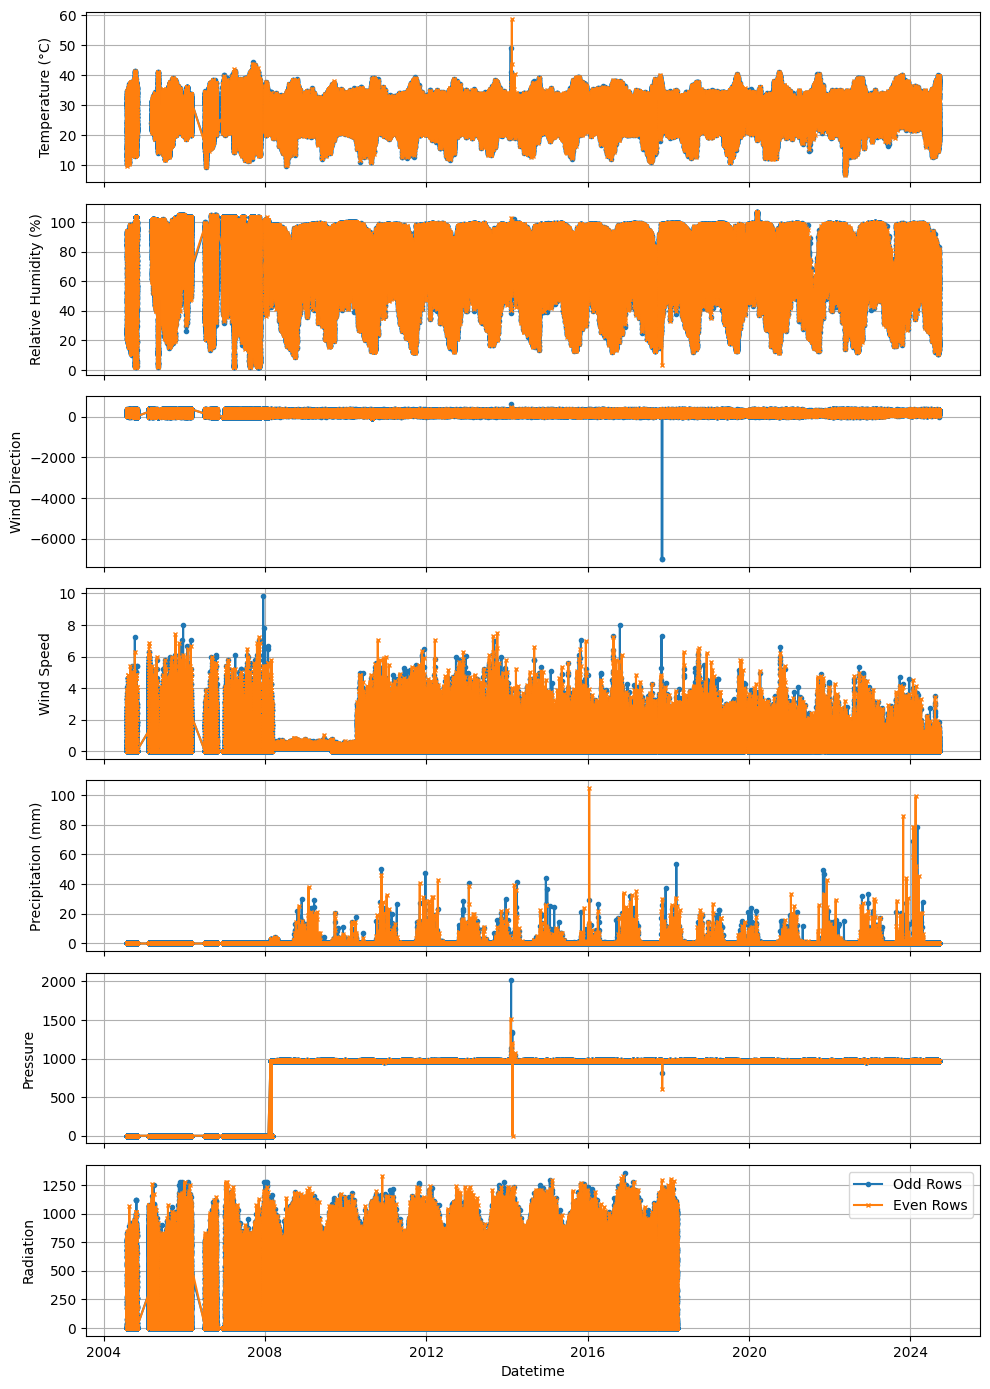

In [30]:
# Define columns to plot
columns_to_plot = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Direction',
                   'Wind Speed', 'Precipitation (mm)', 'Pressure', 'Radiation']

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 14), sharex=True)

# Plot each variable as a subplot
for ax, column in zip(axes, columns_to_plot):
    ax.plot(odd_rows.index, odd_rows[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3)
    ax.plot(even_rows.index, even_rows[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3)
    ax.set_ylabel(column)    
    ax.grid(True)

ax.legend()

# Set x-axis label
axes[-1].set_xlabel("Datetime")

# Adjust layout for better visibility
plt.tight_layout()

print('odd dataframe:')
print(odd_rows.isna().sum())
print('even dataframe:')
print(even_rows.isna().sum())


odd dataframe:
Hour                     49437
Temperature (°C)             1
Relative Humidity (%)        1
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                49437
dtype: int64
even dataframe:
Hour                     49432
Temperature (°C)             0
Relative Humidity (%)        0
Wind Direction               0
Wind Speed                   0
Precipitation (mm)           0
Pressure                     0
Radiation                49432
dtype: int64


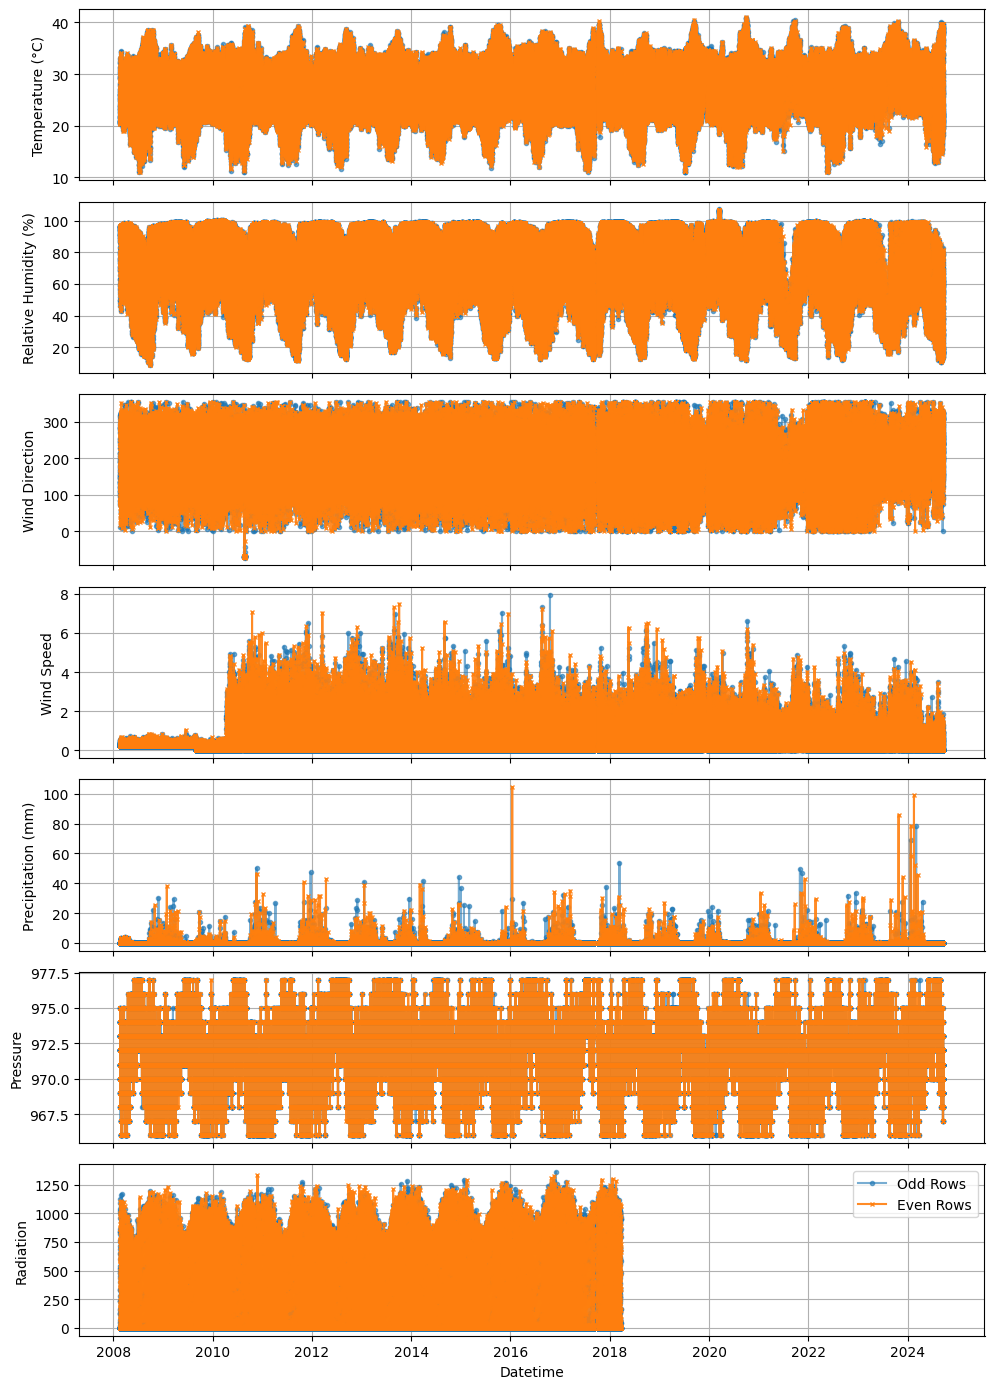

In [34]:
# Clean the data by removing the outliers
# Remove rows where Pressure is zero in both datasets
odd_rows = odd_rows[odd_rows['Pressure'] > 0]
even_rows = even_rows[even_rows['Pressure'] > 0]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Columns to remove outliers from
outlier_columns = ['Temperature (°C)', 'Wind Direction', 'Pressure']

# Remove outliers from both odd and even row datasets
odd_rows_cleaned = remove_outliers(odd_rows, outlier_columns)
even_rows_cleaned = remove_outliers(even_rows, outlier_columns)

def plot_met_data(odds,evens):
    
    columns_to_plot = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Direction',
                   'Wind Speed', 'Precipitation (mm)', 'Pressure', 'Radiation']
    # Replot after outlier removal
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 14), sharex=True)

    # Plot each variable as a subplot
    for ax, column in zip(axes, columns_to_plot):
        ax.plot(odds.index, odds[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3,alpha=0.6)
        ax.plot(evens.index, evens[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3, alpha=0.9)
        ax.set_ylabel(column)
        ax.grid(True)

    ax.legend()
    # Set x-axis label
    axes[-1].set_xlabel("Datetime")

    # Adjust layout for better visibility
    plt.tight_layout()

plot_met_data(odd_rows_cleaned,even_rows_cleaned)

print('odd dataframe:')
print(odd_rows_cleaned.isna().sum())
print('even dataframe:')
print(even_rows_cleaned.isna().sum())


In [58]:
odd_rows_cleaned.describe()

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
count  84920.000000     134356.000000          134356.000000   134357.000000   
mean    1211.727862         25.717496              72.008506      174.107120   
std      694.043151          5.038681              23.327963       74.999328   
min       30.000000         10.950000               8.810000      -72.100000   
25%      600.000000         22.250000              55.080000      112.700000   
50%     1230.000000         24.620000              78.300000      166.500000   
75%     1830.000000         29.790000              93.000000      236.800000   
max     2400.000000         40.930000             107.200000      354.700000   

          Wind Speed  Precipitation (mm)       Pressure     Radiation  
count  134357.000000       134357.000000  134357.000000  84920.000000  
mean        0.670251            0.089475     971.591521    229.272435  
std         0.840251            0.970863       2.304621    324.141851  
min         0.000000            0.000000     966.000000      0.000000  
25%         0.006000            0.000000     970.000000      0.000000  
50%         0.295000            0.000000     972.000000      5.291000  
75%         1.108000            0.000000     973.000000    436.100000  
max         7.970000           78.230000     977.000000   1358.000000

In [60]:
odd_rows_avg_12h
odd_rows_cleaned['Precipitation (mm)'].resample('12h').sum()

Datetime
2008-02-20 00:00:00    0.508
2008-02-20 12:00:00    0.000
2008-02-21 00:00:00    0.000
2008-02-21 12:00:00    0.000
2008-02-22 00:00:00    0.000
                       ...  
2024-09-18 00:00:00    0.000
2024-09-18 12:00:00    0.000
2024-09-19 00:00:00    0.000
2024-09-19 12:00:00    0.000
2024-09-20 00:00:00    0.000
Freq: 12h, Name: Precipitation (mm), Length: 12115, dtype: float64

In [35]:
odd_rows_cleaned.describe()

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
count  84920.000000     134356.000000          134356.000000   134357.000000   
mean    1211.727862         25.717496              72.008506      174.107120   
std      694.043151          5.038681              23.327963       74.999328   
min       30.000000         10.950000               8.810000      -72.100000   
25%      600.000000         22.250000              55.080000      112.700000   
50%     1230.000000         24.620000              78.300000      166.500000   
75%     1830.000000         29.790000              93.000000      236.800000   
max     2400.000000         40.930000             107.200000      354.700000   

          Wind Speed  Precipitation (mm)       Pressure     Radiation  
count  134357.000000       134357.000000  134357.000000  84920.000000  
mean        0.670251            0.089475     971.591521    229.272435  
std         0.840251            0.970863       2.304621    324.141851  
min         0.000000            0.000000     966.000000      0.000000  
25%         0.006000            0.000000     970.000000      0.000000  
50%         0.295000            0.000000     972.000000      5.291000  
75%         1.108000            0.000000     973.000000    436.100000  
max         7.970000           78.230000     977.000000   1358.000000

odd dataframe:
Hour                     8520
Temperature (°C)         6181
Relative Humidity (%)    6181
Wind Direction           6181
Wind Speed               6181
Precipitation (mm)          0
Pressure                 6181
Radiation                8520
dtype: int64
even dataframe:
Hour                     8519
Temperature (°C)         6180
Relative Humidity (%)    6180
Wind Direction           6180
Wind Speed               6180
Precipitation (mm)          0
Pressure                 6180
Radiation                8519
dtype: int64


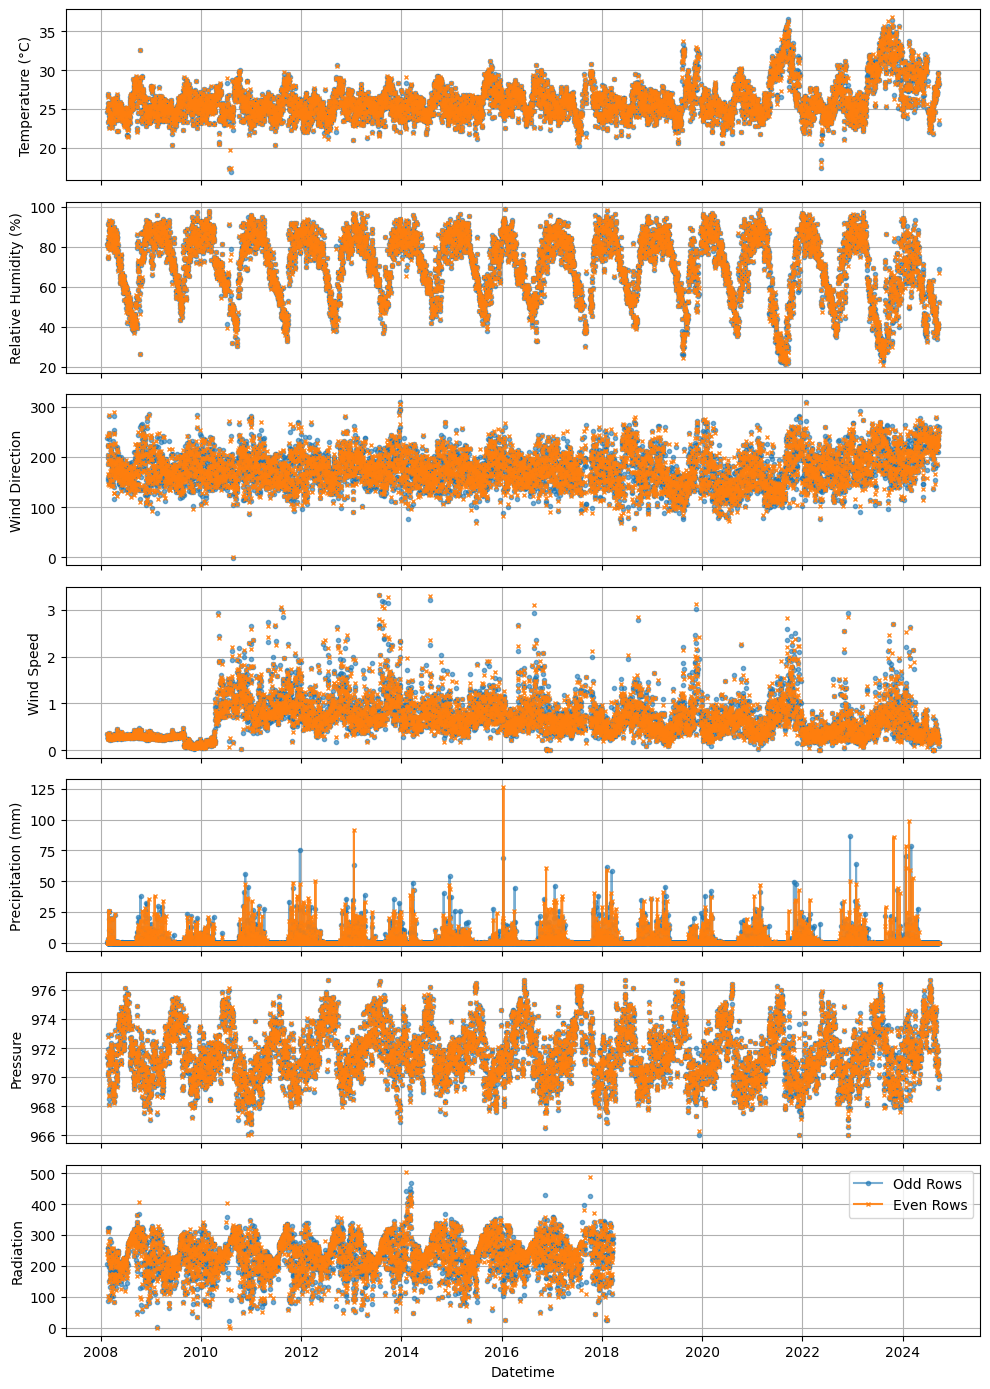

In [61]:
# Resample and average every 12 hours
odd_rows_avg_12h = odd_rows_cleaned.resample('12h').mean()
odd_rows_avg_12h['Precipitation (mm)'] = odd_rows_cleaned['Precipitation (mm)'].resample('12h').sum()
even_rows_avg_12h = even_rows_cleaned.resample('12h').mean()
even_rows_avg_12h['Precipitation (mm)'] = even_rows_cleaned['Precipitation (mm)'].resample('12h').sum()

plot_met_data(odd_rows_avg_12h,even_rows_avg_12h)

print('odd dataframe:')
print(odd_rows_avg_12h.isna().sum())
print('even dataframe:')
print(even_rows_avg_12h.isna().sum())

odd dataframe:
Hour                     2463
Temperature (°C)          124
Relative Humidity (%)     124
Wind Direction            124
Wind Speed                124
Precipitation (mm)          0
Pressure                  124
Radiation                2463
dtype: int64
even dataframe:
Hour                     2462
Temperature (°C)          123
Relative Humidity (%)     123
Wind Direction            123
Wind Speed                123
Precipitation (mm)          0
Pressure                  123
Radiation                2462
dtype: int64


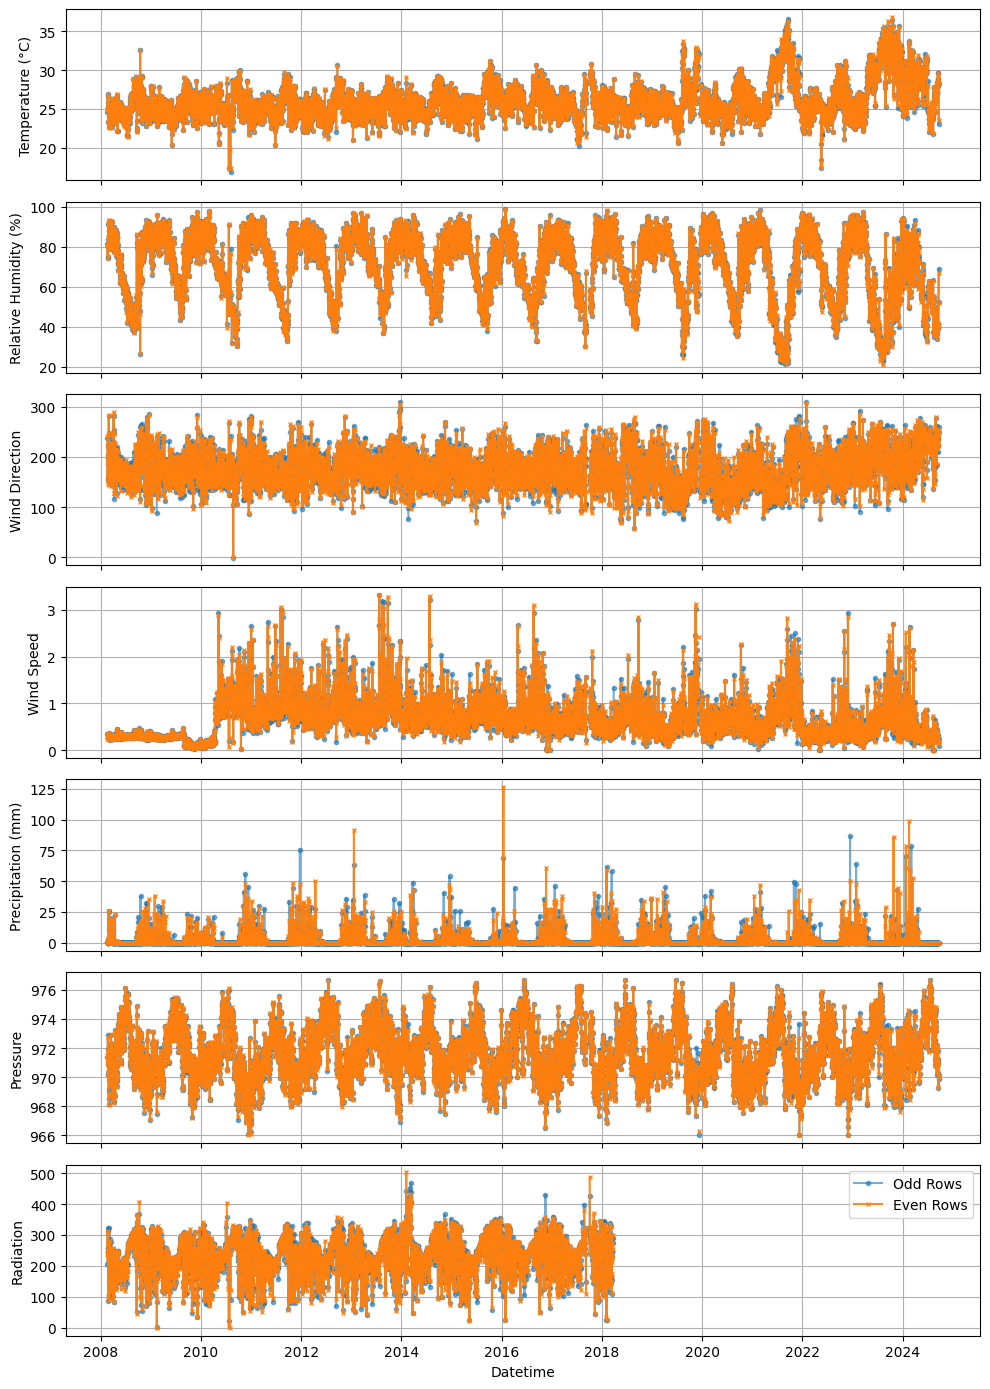

In [62]:
# Resample and average every 12 hours
odd_rows_avg_24h = odd_rows_cleaned.resample('24h').mean()
odd_rows_avg_24h['Precipitation (mm)'] = odd_rows_cleaned['Precipitation (mm)'].resample('24h').sum()
even_rows_avg_24h = even_rows_cleaned.resample('24h').mean()
even_rows_avg_24h['Precipitation (mm)'] = even_rows_cleaned['Precipitation (mm)'].resample('24h').sum()


plot_met_data(odd_rows_avg_24h,even_rows_avg_24h)

print('odd dataframe:')
print(odd_rows_avg_24h.isna().sum())
print('even dataframe:')
print(even_rows_avg_24h.isna().sum())

odd_rows_avg_24h.to_csv('add_rows_df.csv')

In [28]:
odd_rows_avg_24h

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
Datetime                                                                      
2008-02-20  1750.0         24.655714              81.507857      237.035714   
2008-02-21  1180.0         24.710417              82.095833      153.153750   
2008-02-22  1250.0         26.601250              74.830833      157.983333   
2008-02-23  1180.0         25.697500              80.696667      203.695833   
2008-02-24  1250.0         26.934167              74.576667      197.033333   
...            ...               ...                    ...             ...   
2019-12-04     NaN         28.911667              70.863333      181.900000   
2019-12-05     NaN               NaN                    NaN             NaN   
2019-12-06     NaN               NaN                    NaN             NaN   
2019-12-07     NaN               NaN                    NaN             NaN   
2019-12-08     NaN         32.040000              56.525000      237.750000   

            Wind Speed  Precipitation (mm)    Pressure   Radiation  
Datetime                                                            
2008-02-20    0.355429            0.036286  971.357143  207.187143  
2008-02-21    0.258667            0.000000  970.958333  258.074583  
2008-02-22    0.258375            0.000000  971.916667  322.494167  
2008-02-23    0.245250            0.000000  972.916667  241.475292  
2008-02-24    0.280333            0.000000  971.416667  314.043750  
...                ...                 ...         ...         ...  
2019-12-04    0.798833            0.000000  970.000000         NaN  
2019-12-05         NaN                 NaN         NaN         NaN  
2019-12-06         NaN                 NaN         NaN         NaN  
2019-12-07         NaN                 NaN         NaN         NaN  
2019-12-08    1.953000            0.000000  966.000000         NaN  

[4310 rows x 8 columns]

In [117]:
odd_rows_avg_24h

Hour  Temperature (°C)  Relative Humidity (%)  Wind Direction  \
Datetime                                                                      
2008-02-20  1750.0         24.655714              81.507857      237.035714   
2008-02-21  1180.0         24.710417              82.095833      153.153750   
2008-02-22  1250.0         26.601250              74.830833      157.983333   
2008-02-23  1180.0         25.697500              80.696667      203.695833   
2008-02-24  1250.0         26.934167              74.576667      197.033333   
...            ...               ...                    ...             ...   
2019-12-04     NaN         28.911667              70.863333      181.900000   
2019-12-05     NaN               NaN                    NaN             NaN   
2019-12-06     NaN               NaN                    NaN             NaN   
2019-12-07     NaN               NaN                    NaN             NaN   
2019-12-08     NaN         32.040000              56.525000      237.750000   

            Wind Speed  Precipitation (mm)    Pressure   Radiation  \
Datetime                                                             
2008-02-20    0.355429            0.036286  971.357143  207.187143   
2008-02-21    0.258667            0.000000  970.958333  258.074583   
2008-02-22    0.258375            0.000000  971.916667  322.494167   
2008-02-23    0.245250            0.000000  972.916667  241.475292   
2008-02-24    0.280333            0.000000  971.416667  314.043750   
...                ...                 ...         ...         ...   
2019-12-04    0.798833            0.000000  970.000000         NaN   
2019-12-05         NaN                 NaN         NaN         NaN   
2019-12-06         NaN                 NaN         NaN         NaN   
2019-12-07         NaN                 NaN         NaN         NaN   
2019-12-08    1.953000            0.000000  966.000000         NaN   

            Temperature_K  Vapor_Pressure  Specific_Humidity  
Datetime                                                      
2008-02-20     297.805714       25.291300           0.016356  
2008-02-21     297.860417       25.557244           0.016537  
2008-02-22     299.751250       26.064267           0.016851  
2008-02-23     298.847500       26.643713           0.017212  
2008-02-24     300.084167       26.490157           0.017138  
...                   ...             ...                ...  
2019-12-04     302.061667       28.252843           0.018318  
2019-12-05            NaN             NaN                NaN  
2019-12-06            NaN             NaN                NaN  
2019-12-07            NaN             NaN                NaN  
2019-12-08     305.190000       26.962523           0.017546  

[4310 rows x 11 columns]

In [63]:
def convert_humidity(df):
    # Define constants for the conversion
    A = 6.112  # hPa
    B = 17.67
    C = 243.5
    epsilon = 0.622  # Ratio of molecular weight of water vapor to dry air

    # Convert Temperature from Celsius to Kelvin
    df['Temperature_K'] = df['Temperature (°C)'] + 273.15

    # Compute Vapor Pressure (e) in hPa
    df['Vapor_Pressure'] = (
        df['Relative Humidity (%)'] *
        (A * np.exp((B * df['Temperature (°C)']) / (df['Temperature (°C)'] + C))) / 100
    )

    # Compute Specific Humidity (kg/kg)
    df['Specific_Humidity'] = (
        (epsilon * df['Vapor_Pressure']) /
        (df['Pressure'] - (0.378 * df['Vapor_Pressure']))
    )

    return df

odd_rows_avg_24h=convert_humidity(odd_rows_avg_24h)
even_rows_avg_24h=convert_humidity(even_rows_avg_24h)


#calcualte longwave radiation
def calc_longwave_rad(df):
    # Constants for the Stefan-Boltzmann equation
    emissivity = 0.98  # Typical for natural surfaces
    stefan_boltzmann_constant = 5.67e-8  # W/m²K⁴

    # Convert Temperature from Celsius to Kelvin
    df['Temperature (°K)'] = df['Temperature (°C)'] + 273.15

    # Calculate Longwave Radiation (LW)
    df['Longwave_Radiation'] = (
        emissivity * stefan_boltzmann_constant * (df['Temperature (°K)'] ** 4)
    )
    return df

odd_rows_avg_24h=calc_longwave_rad(odd_rows_avg_24h)
even_rows_avg_24h=calc_longwave_rad(even_rows_avg_24h)

#calculate v and u wind speed in (m/s)
def calc_U_V_speed(df):
    # Convert wind direction from degrees to radians
    df['Wind_Direction_Rad'] = np.radians(df['Wind Direction'])

    # Calculate U and V components of wind speed
    df['Uspeed'] = -df['Wind Speed'] * np.sin(df['Wind_Direction_Rad'])
    df['Vspeed'] = -df['Wind Speed'] * np.cos(df['Wind_Direction_Rad'])

    return df

odd_rows_avg_24h=calc_U_V_speed(odd_rows_avg_24h)
even_rows_avg_24h=calc_U_V_speed(even_rows_avg_24h)

#convert pressure to Pa 
odd_rows_avg_24h['Pressure']=odd_rows_avg_24h['Pressure']*100
even_rows_avg_24h['Pressure']=even_rows_avg_24h['Pressure']*100

#convert precip (mm) to to (m/s) (86400 sec in a day *1000 (mm in m))
odd_rows_avg_24h['Precipitation (m/s)']= odd_rows_avg_24h['Precipitation (mm)']/(86400*1000)
even_rows_avg_24h['Precipitation (m/s)']=even_rows_avg_24h['Precipitation (mm)']/(86400*1000)


# Convert met data to LAKE input compatable
def convert_data_LAKE_input_compatable(df):
    
    # Check if Datetime is set as the index
    if df.index.name == 'Datetime':
        # Reset index to make Datetime a column
        df = df.reset_index()

    # Convert Datetime to separate Year, Month, and Day columns
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day

    # Rename and select columns in the specified order
    df_renamed = df.rename(columns={
        'Uspeed': 'Uspeed',
        'Vspeed': 'Vspeed',
        'Temperature (°K)': 'Temp',
        'Specific_Humidity': 'Hum',
        'Pressure': 'Pres',
        'Radiation': 'SWdown',
        'Longwave_Radiation': 'LWdown',
        'Precipitation (m/s)': 'Precip'
    })[['Year', 'Month', 'Day', 'Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']]
    return df_renamed

odd_rows_avg_24h_LAKE=convert_data_LAKE_input_compatable(odd_rows_avg_24h)
even_rows_avg_24h_LAKE=convert_data_LAKE_input_compatable(even_rows_avg_24h)
even_rows_avg_24h_LAKE.to_csv('odd_rows_avg_24h_LAKE.csv')
even_rows_avg_24h_LAKE.to_csv('even_rows_avg_24h_LAKE.csv')

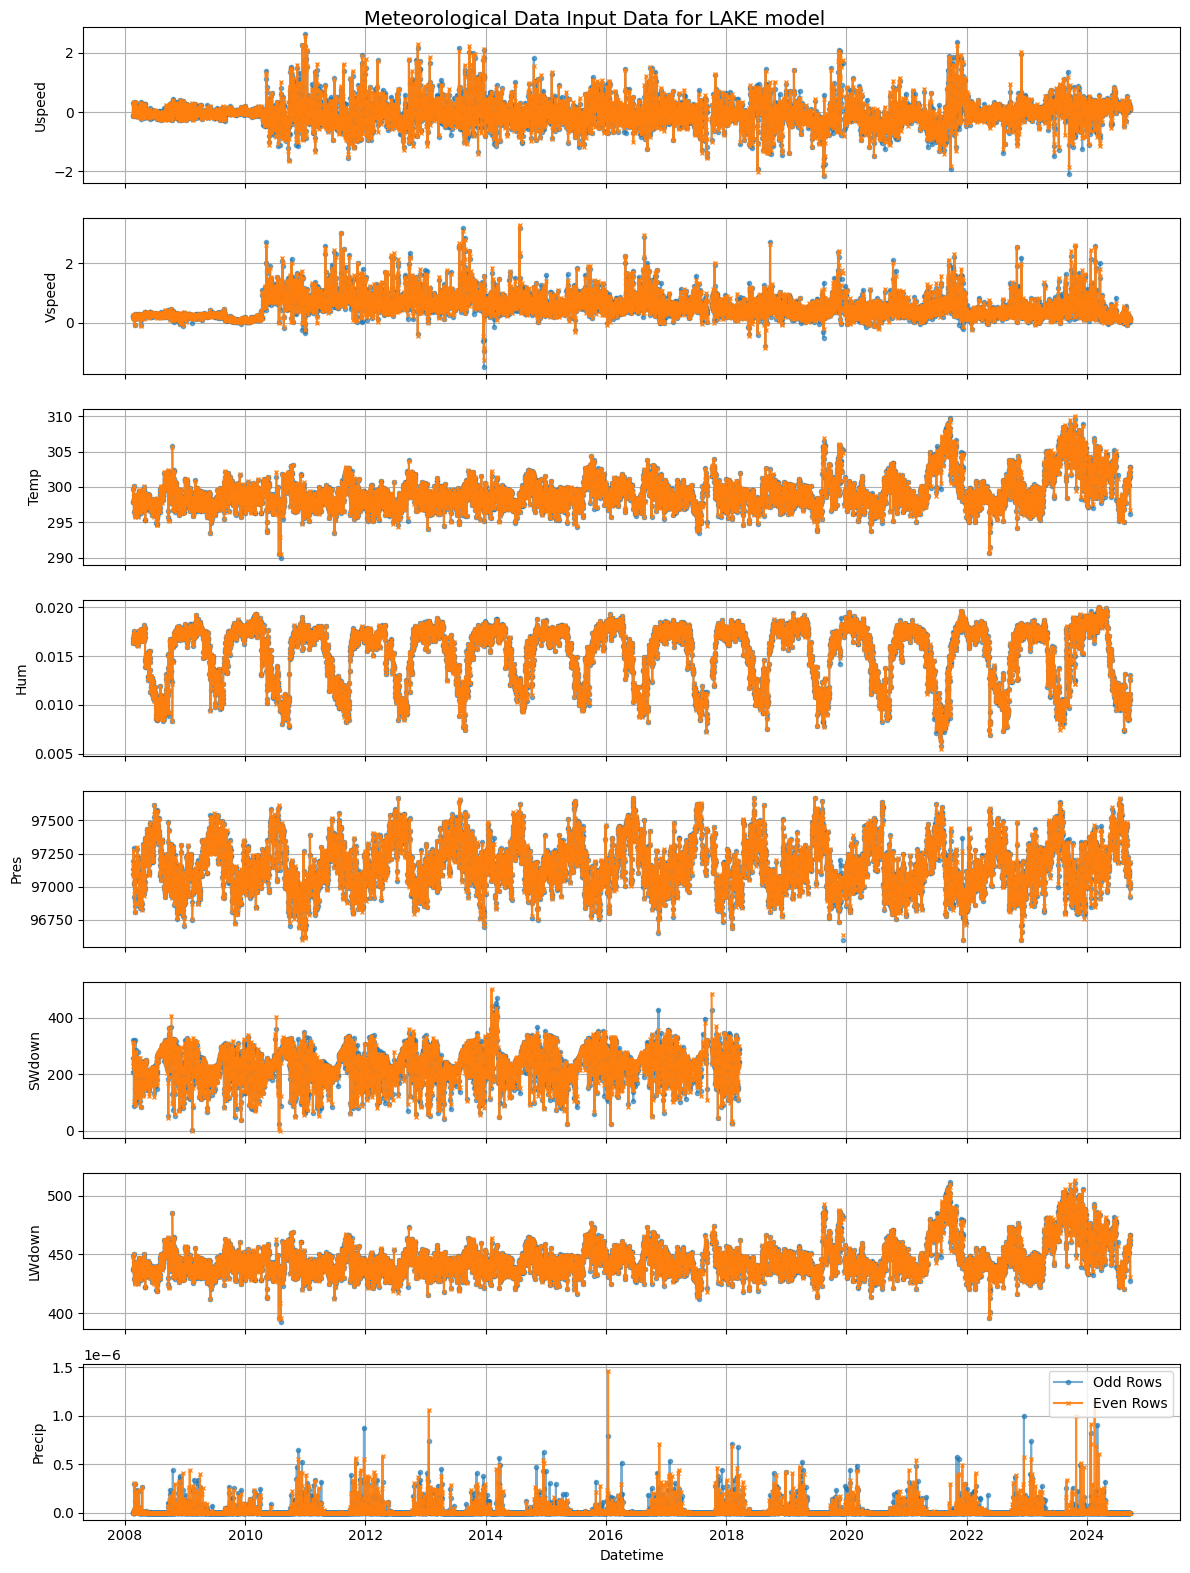

In [64]:
#,even_rows_avg_24h_LAKE)

def plot_met_dat_LAKE(odds,evens):
    # Define the columns to plot
    columns_to_plot = ['Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']

    # Create a datetime column for plotting
    odds['Datetime'] = pd.to_datetime(odds[['Year', 'Month', 'Day']])
    evens['Datetime'] = pd.to_datetime(evens[['Year', 'Month', 'Day']])

    # Create subplots
    fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 16), sharex=True)

    # Plot each variable
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(odds['Datetime'], odds[column], label=f"Odd Rows", linestyle='-', marker='o', markersize=3,alpha=0.6)
        axes[i].plot(evens['Datetime'], evens[column], label=f"Even Rows", linestyle='-', marker='x', markersize=3, alpha=0.9)
        axes[i].set_ylabel(column)
        axes[i].grid(True)
       
    axes[-1].legend(loc='upper right')

    # Set common labels
    axes[-1].set_xlabel("Datetime")
    fig.suptitle("Meteorological Data Input Data for LAKE model", fontsize=14)

    # Improve layout
    plt.tight_layout()

plot_met_dat_LAKE(odd_rows_avg_24h_LAKE,even_rows_avg_24h_LAKE)

In [40]:

file_path = "Tanguro_LAKE_Tanguro_transient.dat" #ERA
met_data_TL = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
met_data_TL.head()

Year  Month  Day    Uspeed    Vspeed        Temp       Hum          Pres  \
0  2019      1    1 -0.229542 -0.280020  297.174211  0.018108  97280.698619   
1  2019      1    2 -0.525300  0.157582  298.937422  0.018534  97332.298049   
2  2019      1    3 -0.203469 -0.621346  300.154941  0.019062  97189.056238   
3  2019      1    4  0.026678 -0.262133  299.707519  0.018787  97232.430827   
4  2019      1    5  0.199548  0.422542  298.459321  0.018946  97289.617564   

       SWdown      LWdown        Precip  
0  152.419903  408.180447  7.865400e-08  
1  291.743777  409.887077  4.421840e-08  
2  288.581452  411.535394  2.680962e-08  
3  276.660249  411.914060  9.051289e-08  
4  241.842295  414.532421  9.709190e-08

In [53]:
odd_rows_avg_24h_LAKE.head()

Year  Month  Day    Uspeed    Vspeed        Temp       Hum          Pres  \
0  2008      2   20  0.298208  0.193394  297.805714  0.016356  97135.714286   
1  2008      2   21 -0.116813  0.230788  297.860417  0.016537  97095.833333   
2  2008      2   22 -0.096859  0.239533  299.751250  0.016851  97191.666667   
3  2008      2   23  0.098561  0.224573  298.847500  0.017212  97291.666667   
4  2008      2   24  0.082117  0.268036  300.084167  0.017138  97141.666667   

       SWdown      LWdown        Precip   Datetime  
0  207.187143  437.060181  4.199735e-10 2008-02-20  
1  258.074583  437.381395  0.000000e+00 2008-02-21  
2  322.494167  448.593675  0.000000e+00 2008-02-22  
3  241.475292  443.208053  0.000000e+00 2008-02-23  
4  314.043750  450.589908  0.000000e+00 2008-02-24

In [41]:
odd_rows_avg_24h_LAKE.tail(10)

Year  Month  Day    Uspeed    Vspeed        Temp       Hum  \
6048  2024      9   11  0.313534  0.041672  301.580417  0.008536   
6049  2024      9   12  0.196330  0.110758  301.050833  0.010084   
6050  2024      9   13  0.271061  0.187633  301.492500  0.010312   
6051  2024      9   14  0.188515  0.207145  301.961250  0.010086   
6052  2024      9   15  0.127975  0.134803  301.758333  0.010002   
6053  2024      9   16  0.088693  0.158210  302.072083  0.010455   
6054  2024      9   17  0.157165  0.109997  302.752500  0.010650   
6055  2024      9   18  0.117557  0.125042  302.751667  0.011084   
6056  2024      9   19  0.213362  0.082829  301.413333  0.013023   
6057  2024      9   20  0.093024  0.018774  296.187000  0.012538   

              Pres  SWdown      LWdown  Precip   Datetime  
6048  97070.833333     NaN  459.644092     0.0 2024-09-11  
6049  97125.000000     NaN  456.423997     0.0 2024-09-12  
6050  97087.500000     NaN  459.108345     0.0 2024-09-13  
6051  97095.833333     NaN  461.970233     0.0 2024-09-14  
6052  97108.333333     NaN  460.729716     0.0 2024-09-15  
6053  97179.166667     NaN  462.648862     0.0 2024-09-16  
6054  97029.166667     NaN  466.831429     0.0 2024-09-17  
6055  96925.000000     NaN  466.826289     0.0 2024-09-18  
6056  97012.500000     NaN  458.626319     0.0 2024-09-19  
6057  96990.000000     NaN  427.634865     0.0 2024-09-20

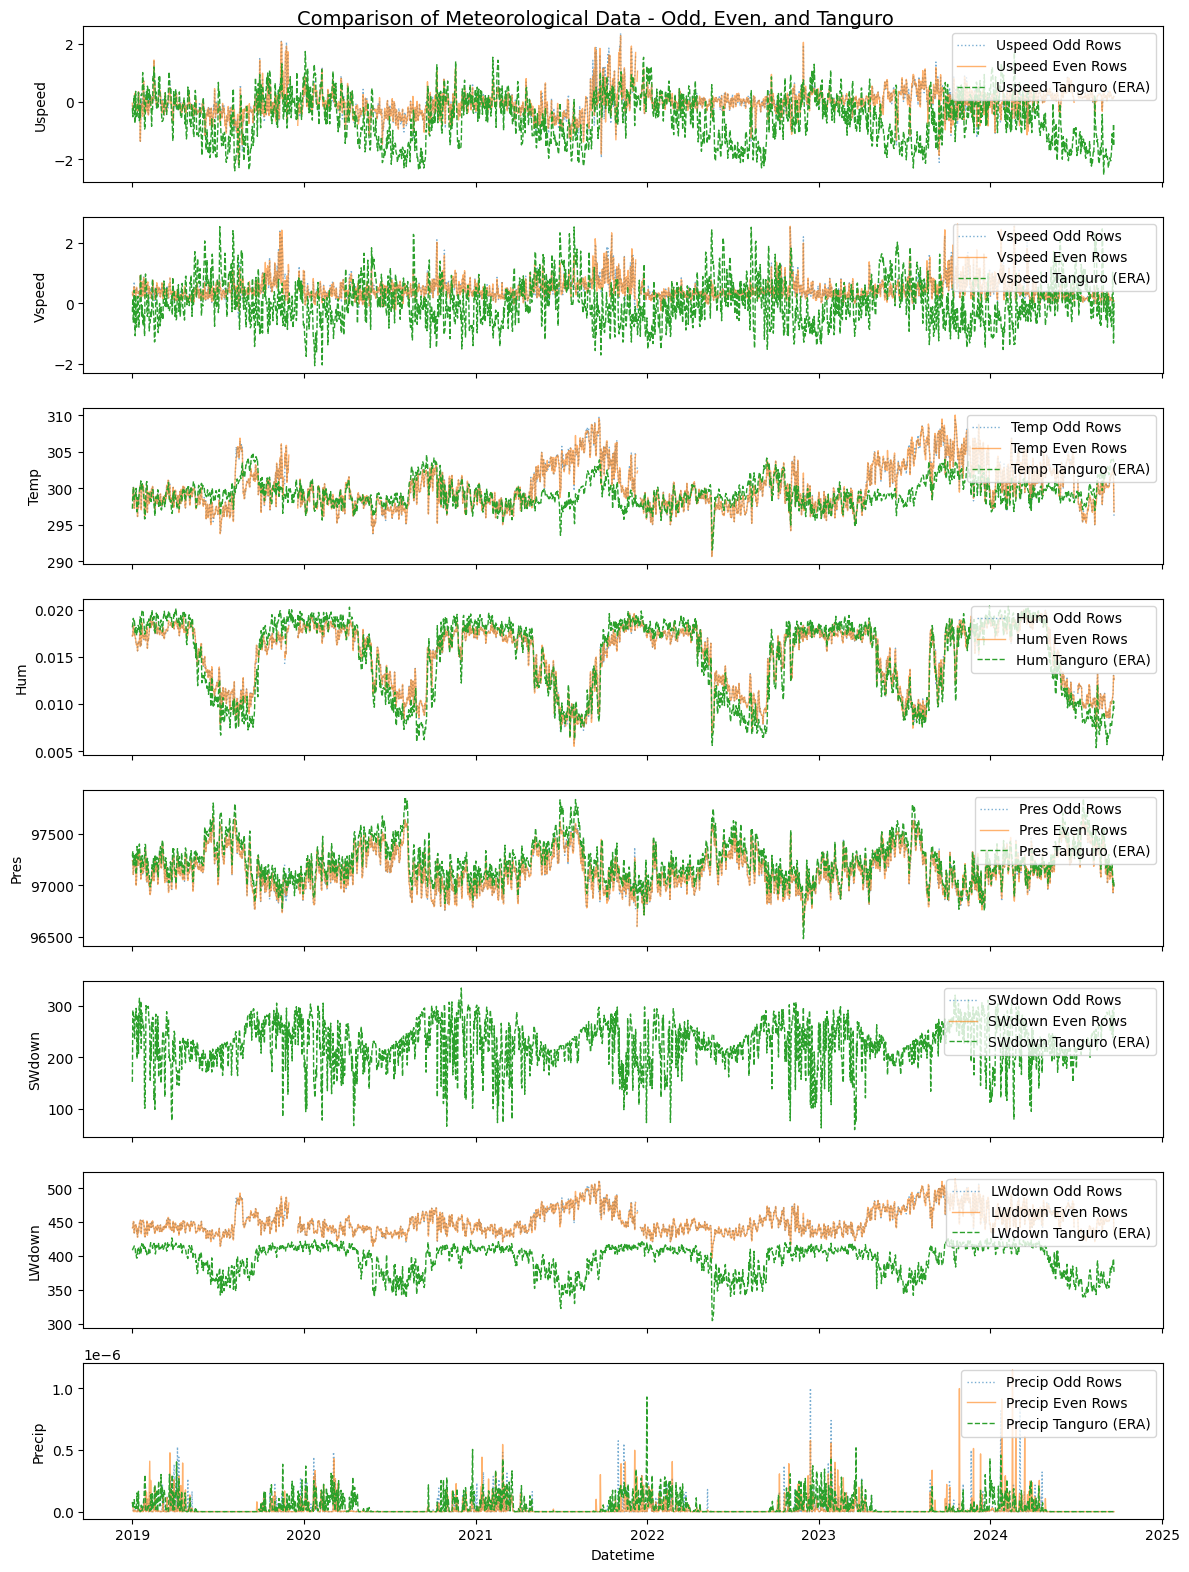

In [65]:
def show_overlap(odd_met_data,even_met_data,tanguro_data):
    # Convert to datetime for merging
    odd_met_data['Datetime'] = pd.to_datetime(odd_met_data[['Year', 'Month', 'Day']])
    even_met_data['Datetime'] = pd.to_datetime(even_met_data[['Year', 'Month', 'Day']])
    tanguro_data['Datetime'] = pd.to_datetime(tanguro_data[['Year', 'Month', 'Day']])

    # Merge all datasets on Year, Month, and Day
    merged_data = pd.merge(odd_met_data, even_met_data, on=['Year', 'Month', 'Day'], suffixes=('_odd', '_even'))
    merged_data = pd.merge(merged_data, tanguro_data, on=['Year', 'Month', 'Day'], suffixes=('', '_tanguro'))

    # Define variables for plotting
    variables = ['Uspeed', 'Vspeed', 'Temp', 'Hum', 'Pres', 'SWdown', 'LWdown', 'Precip']

    # Create subplots for overlaying the three datasets
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 16), sharex=True)

    for i, var in enumerate(variables):
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}_odd'], label=f'{var} Odd Rows', linewidth=1, linestyle='dotted', alpha=0.6)
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}_even'], label=f'{var} Even Rows', linewidth=1, alpha=0.6)
        axes[i].plot(merged_data['Datetime'], merged_data[f'{var}'], label=f'{var} Tanguro (ERA)', linewidth=1, linestyle='dashed')
        axes[i].set_ylabel(var)
        axes[i].legend(loc='upper right')

    axes[-1].set_xlabel("Datetime")
    fig.suptitle("Comparison of Meteorological Data - Odd, Even, and Tanguro", fontsize=14)
    plt.tight_layout()

show_overlap(odd_rows_avg_24h_LAKE,even_rows_avg_24h_LAKE,met_data_TL)